In [9]:
# coding=utf-8
%matplotlib inline
import numpy as np
from sklearn import datasets

In [10]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [11]:
np.unique(y)

array([0, 1, 2])

In [12]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
# random_state=0　是为了让每次分割成一样的集合，每次得到相同的精准度，便于调参

In [13]:
# 进行standardScale，否则可能不收敛
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [14]:
# 感知机训练
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

C:\software\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=None, n_iter=40, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f%%' % ((y_test == y_pred).sum()/len(y_test)*100))

Misclassified samples: 9
Accuracy: 80.00%


In [16]:
# 正确率也可以这样：
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.80


In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, slpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=cmap(idx),
            marker=markers[idx], label=cl)

        # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
            alpha=1.0, linewidth=1, marker='o',
            s=55, label='test set')

C:\software\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'slpha'
  s)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


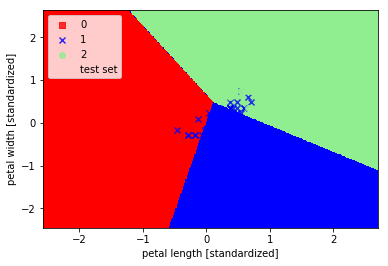

In [18]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [19]:
# LR模型
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0) #C:正则化项
lr.fit(X_train_std, y_train)

C:\software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [20]:
y_pred = lr.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Misclassified samples: 1
Accuracy: 0.9778


In [22]:
# SVM模型
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('SVM Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Misclassified samples: 1
SVM Accuracy: 0.9778


In [23]:
# SGD 中的SVM模型
from sklearn.linear_model import SGDClassifier

svm = SGDClassifier(loss='hinge')
svm.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('SGD SVM Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Misclassified samples: 1
SGD SVM Accuracy: 0.9778


C:\software\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


C:\software\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'slpha'
  s)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


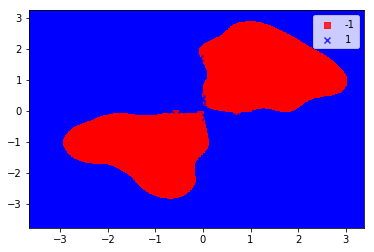

Misclassified samples: 0
SVM XOR Accuracy: 1.0000


In [31]:
# 非线性模型
np.random.seed(0)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

svm = SVC(kernel='rbf', random_state=0, gamma=5.0, C=10.0) 
# 其中参数gamma可以被理解为高斯球面的阶段参数，如果我们增大gamma值，会产生更加柔软的决策界。 gamma太大容易过拟合
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend()
plt.show()

y_pred = svm.predict(X_xor)
print('Misclassified samples: %d' % (y_xor != y_pred).sum())
print('SVM XOR Accuracy: %.4f' % accuracy_score(y_xor, y_pred))

In [33]:
# 决策树
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('SVM XOR Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Misclassified samples: 1
SVM XOR Accuracy: 0.9778


In [34]:
# sklearn可以将训练好的树保存成dot文件
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='tree.dot', feature_names=['petal length', 'petal width'])

In [35]:
# 随机森林
# 在实际运用随机森林模型时，树的数目(k)需要好好调参。一般，k越大，随机森林的性能越好，当然计算成本也越高。
# bagging 样本大小n能够控制bias-variance平衡，如果n很大，我们就减小了随机性因此随机森林就容易过拟合。
# 如果n很小，虽然不会过拟合，但模型的性能会降低。
# 一般n等于原始训练集大小
# 每次分割时取得特征集的大小默认是d = m ^ 0.5, 这个数值比较合理
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
# 随机森林一个比较好的特征是可以并行训练 n_jobs来设置并行数
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('SVM XOR Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Misclassified samples: 2
SVM XOR Accuracy: 0.9556


In [36]:
# KNN, 它并不会去学习一个判别式函数(损失函数) [决策树的损失函数可以使基尼指数], 它要记住整个训练集
# 它要把训练集装进内存里去进行预测,所以局限度还是很高的,而且维数一高容易过拟合,也不能用正则项去防止过拟合,只能够用特征选择和降维的方法来防止过拟合
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('SVM XOR Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Misclassified samples: 0
SVM XOR Accuracy: 1.0000
